データのサイズ: (733, 211)
カラム名: Index(['InspectionDateAndId', 'Age', 'target', 'LatencyMean', 'LatencyMin',
       'LatencyMax', 'LatencyStd', 'SaccadeCountMean', 'SaccadeCountMin',
       'SaccadeCountMax'],
      dtype='object') ...
NaN値の合計: 128


c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP結果:
        UMAP1     UMAP2 EyeSide  MoCA
0    4.894701 -1.957261    None  None
1    4.780275  0.682796    None  None
2    3.760185 -1.430523    None  None
3    5.594049  1.589579    None  None
4    6.443683 -3.040199    None  None
..        ...       ...     ...   ...
728  4.755683  0.172338    None  None
729  3.035161 -2.720259    None  None
730  6.124382 -2.082371    None  None
731  6.610013  1.486903    None  None
732  3.427943 -0.431320    None  None

[733 rows x 4 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_22908\130568773.py:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


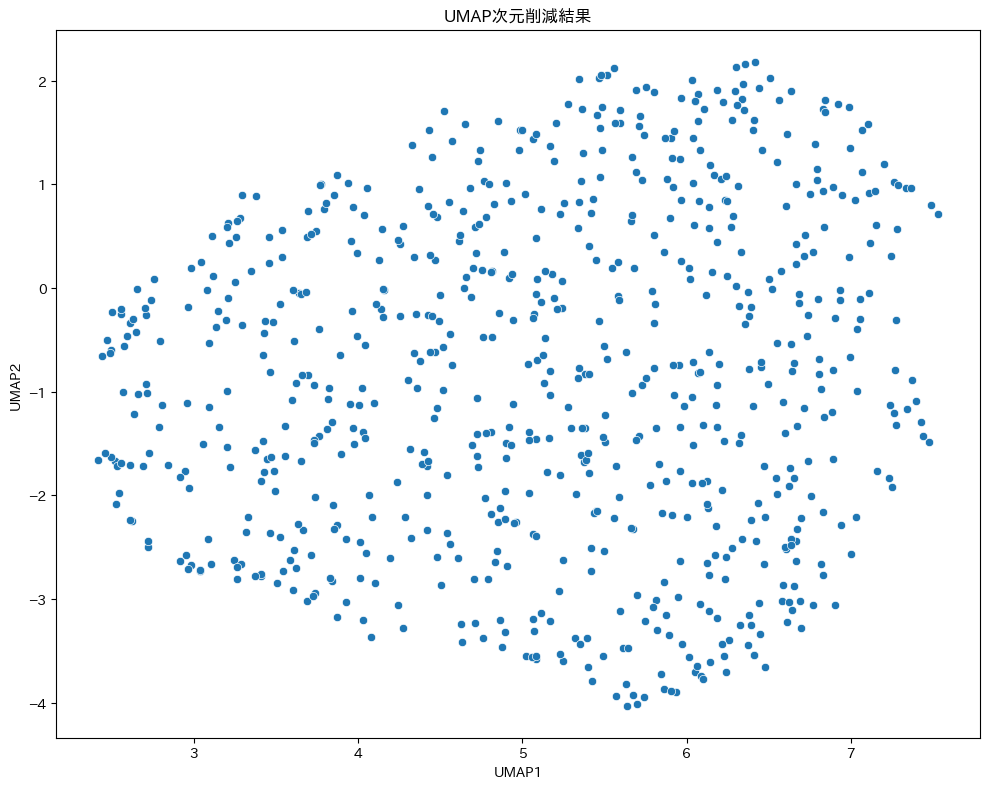

c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\user\AppData\Local\Temp\ipykernel_22908\130568773.py:90: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


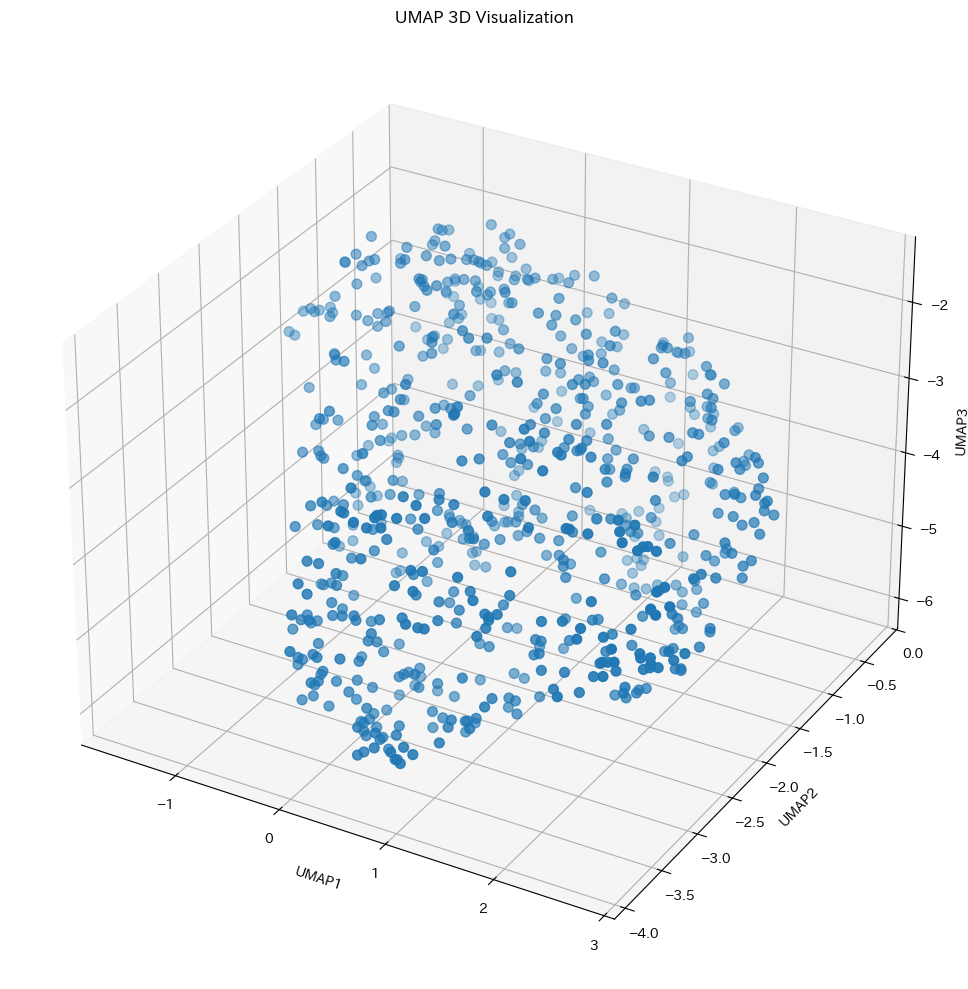

c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\user\anaconda3\envs\mci_env\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\user\AppData\Local\Temp\ipykernel_22908\130568773.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co

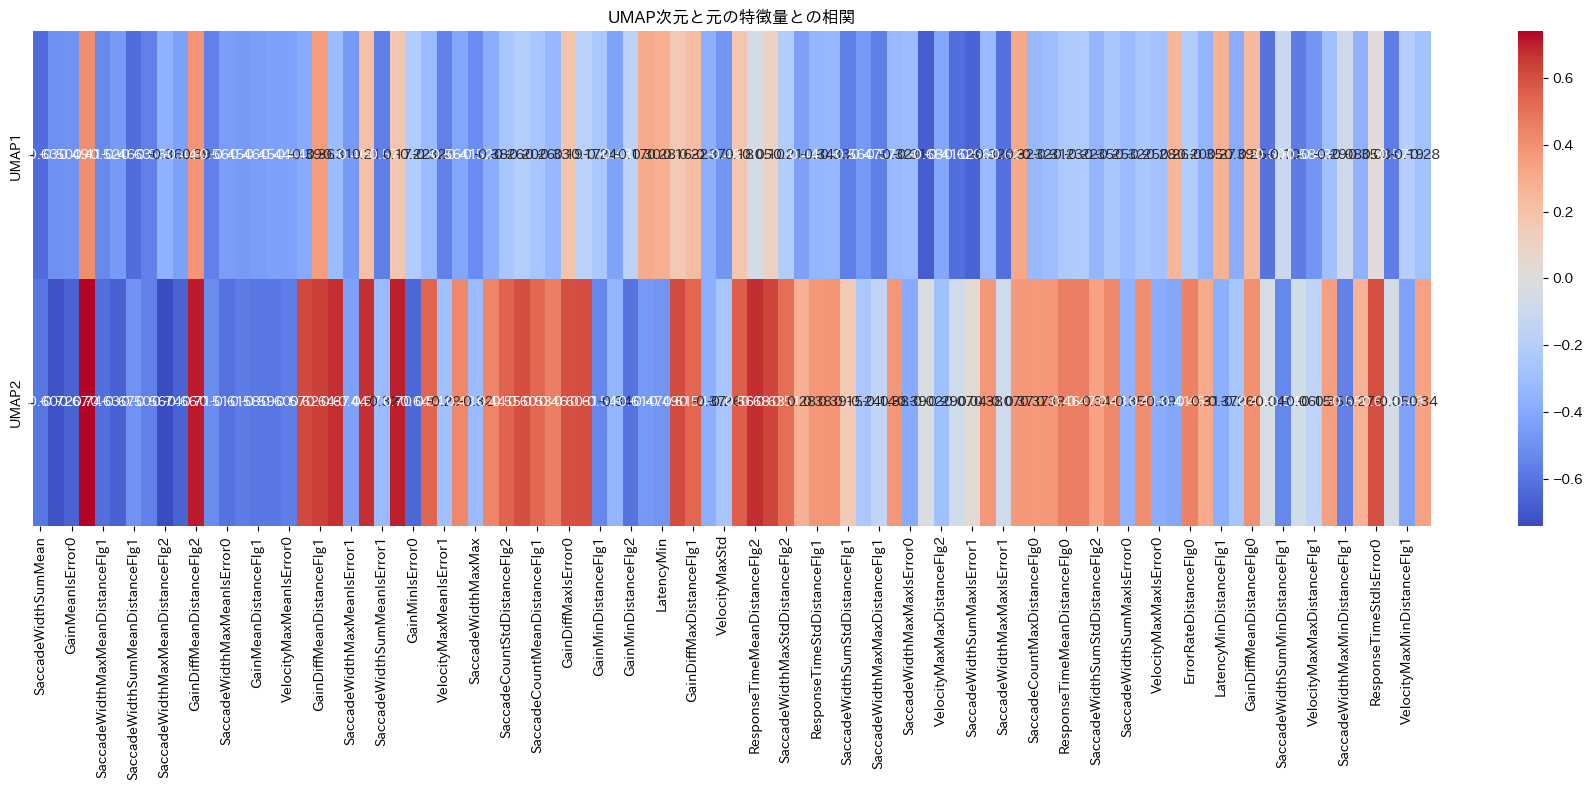

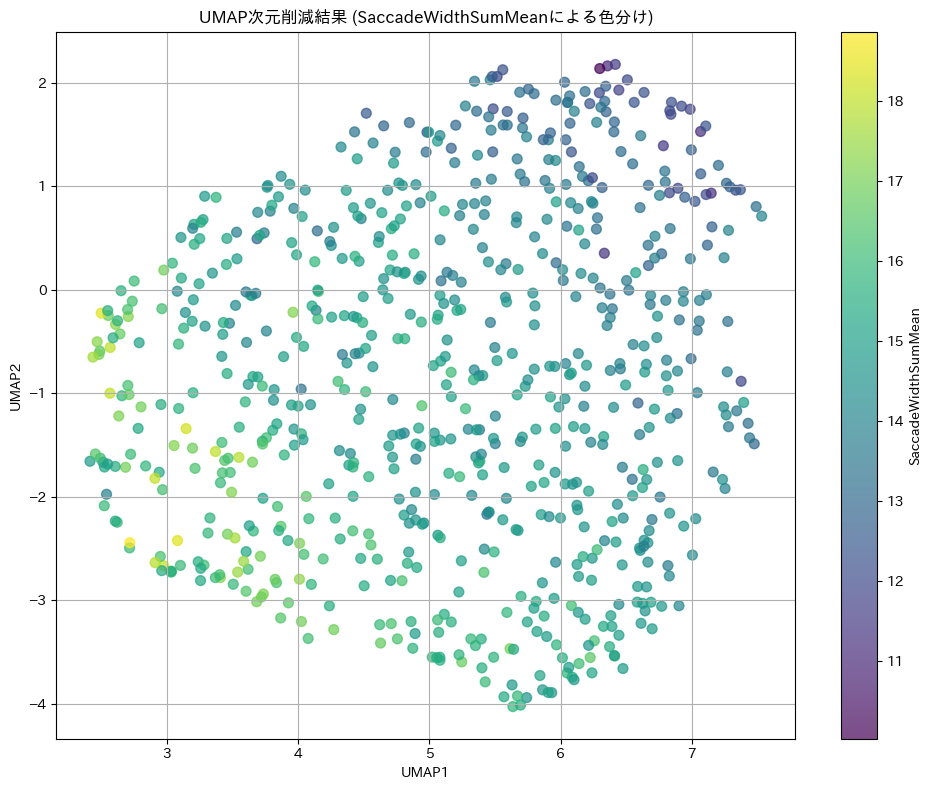

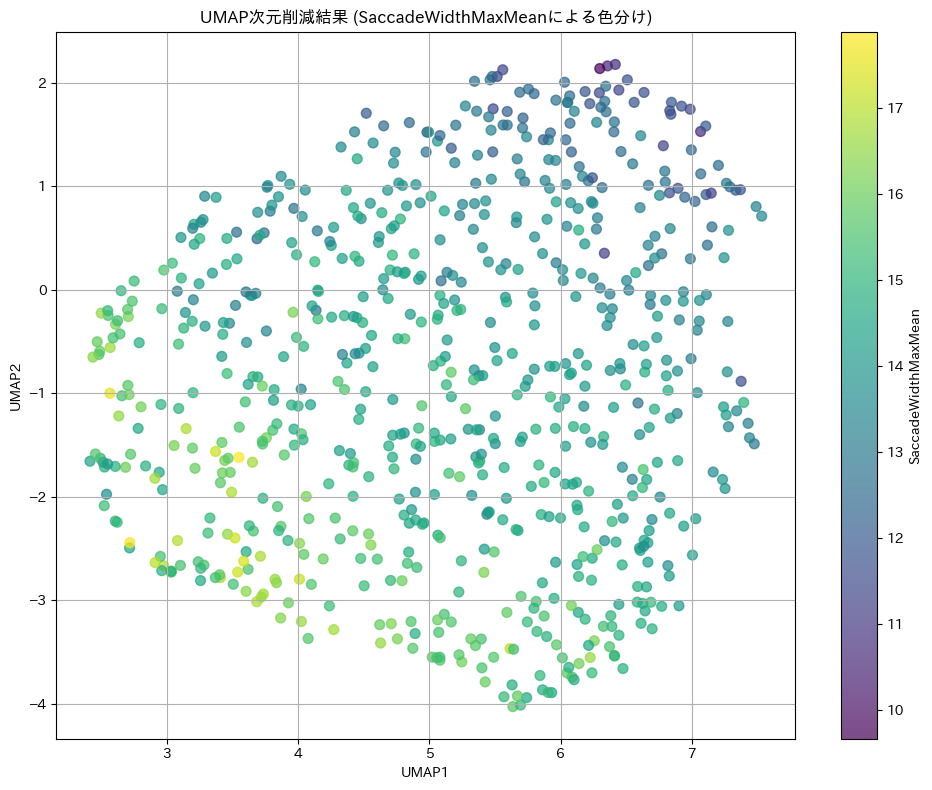

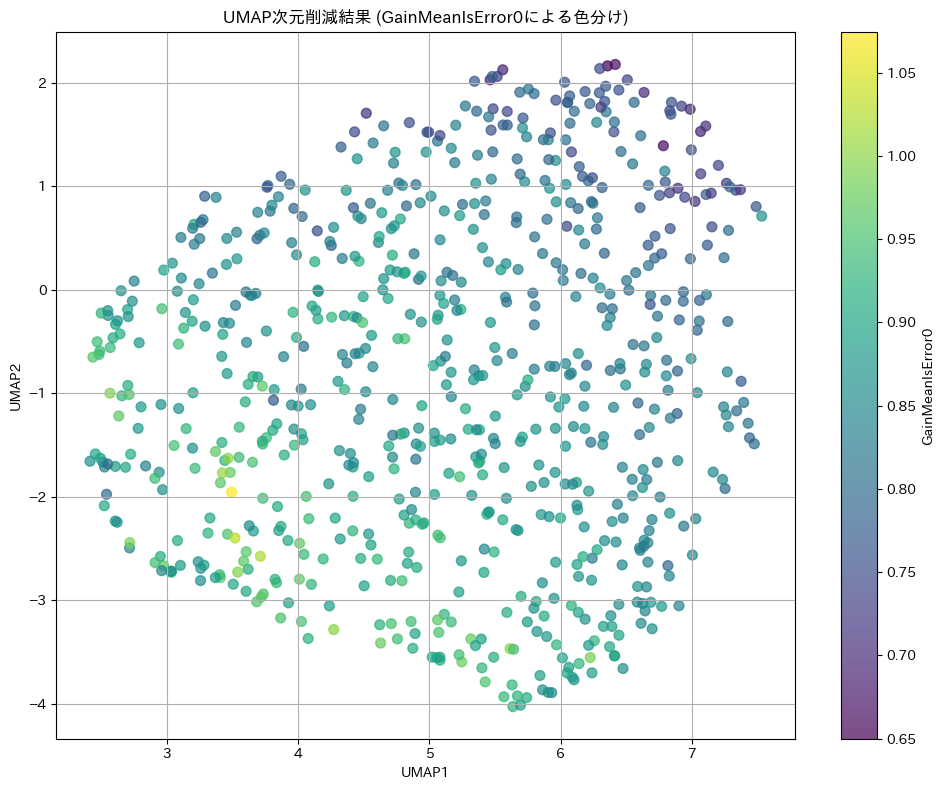

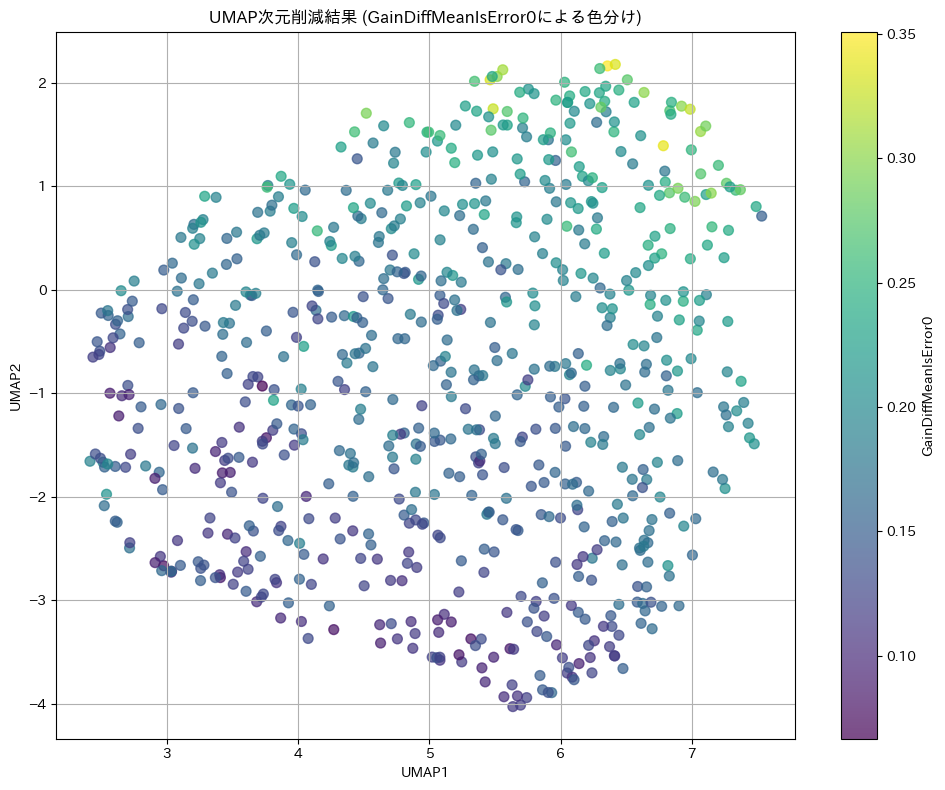

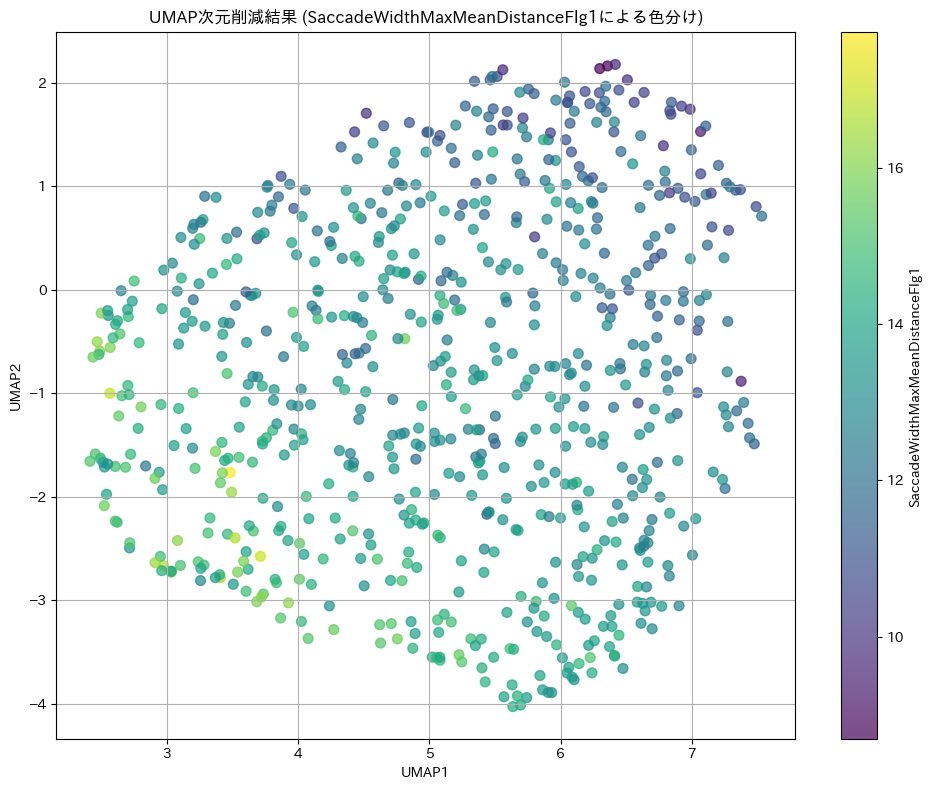

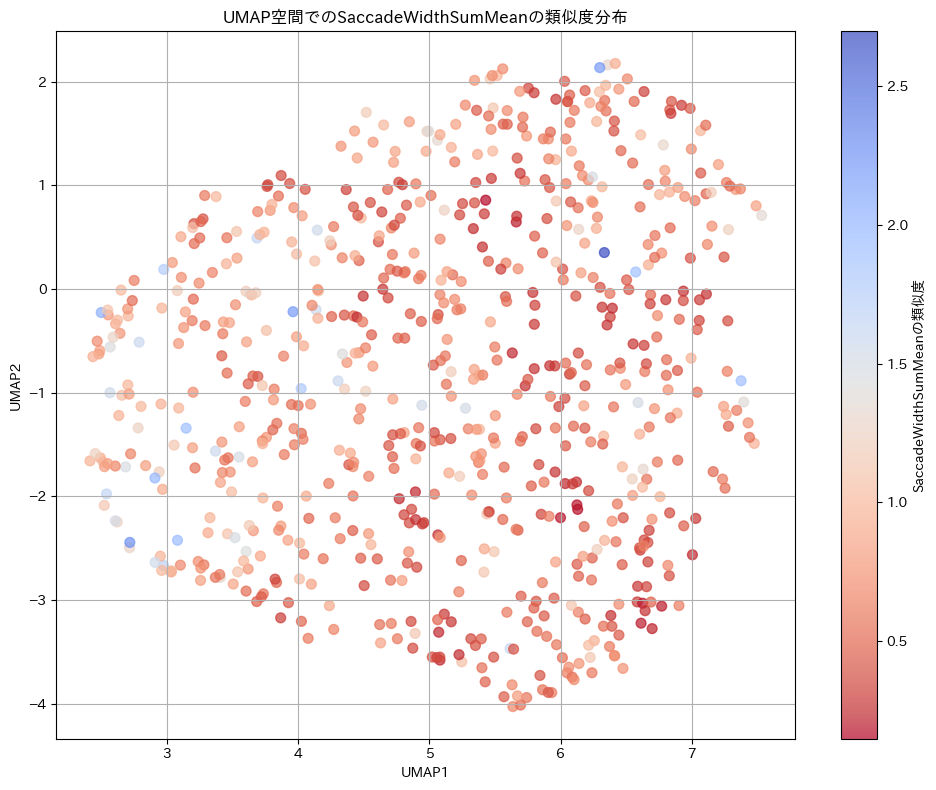

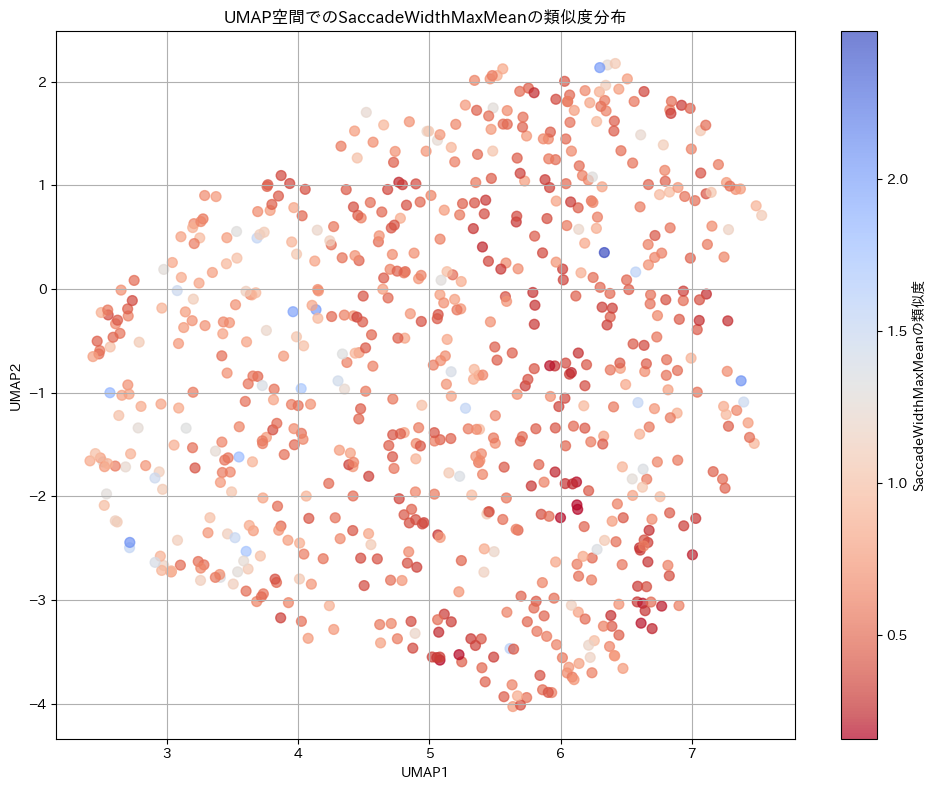

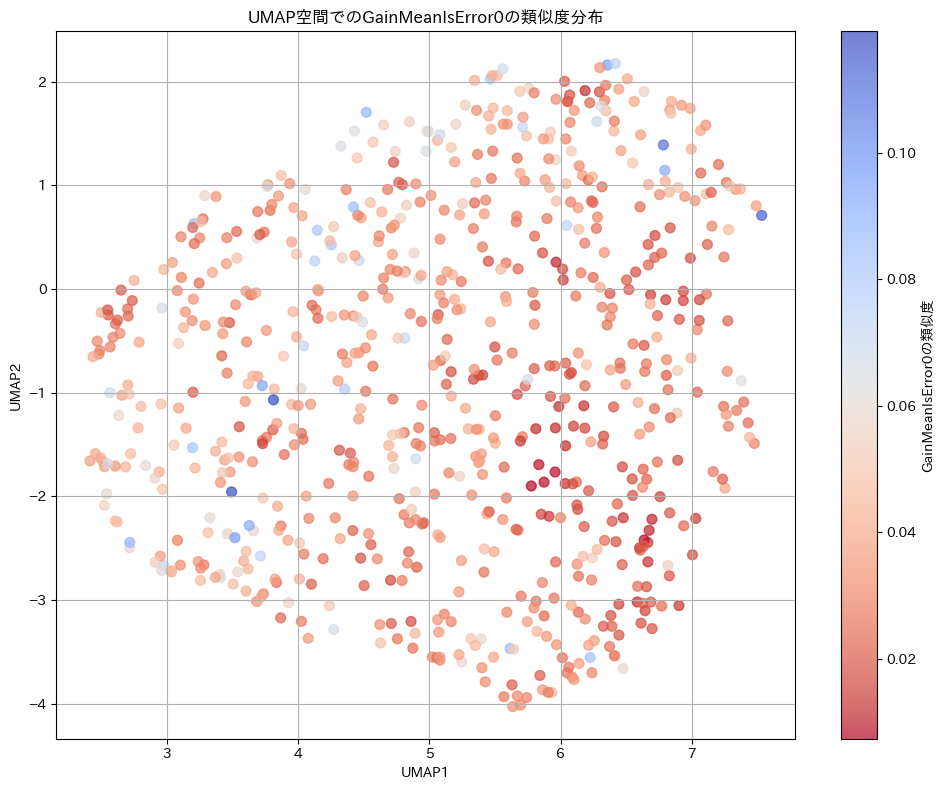

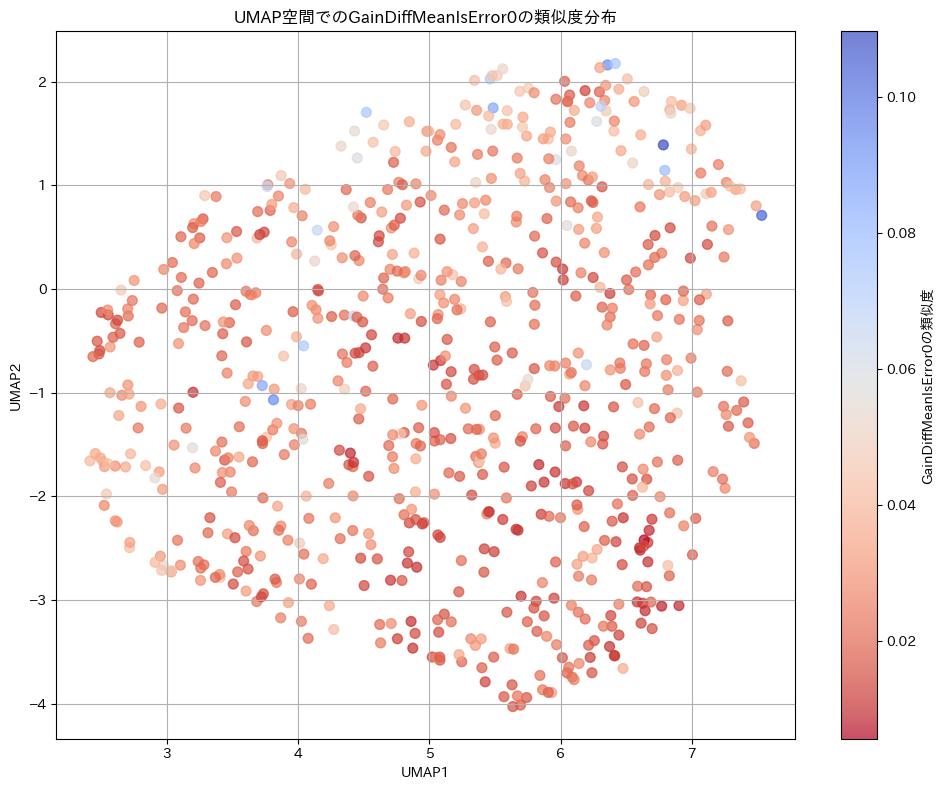

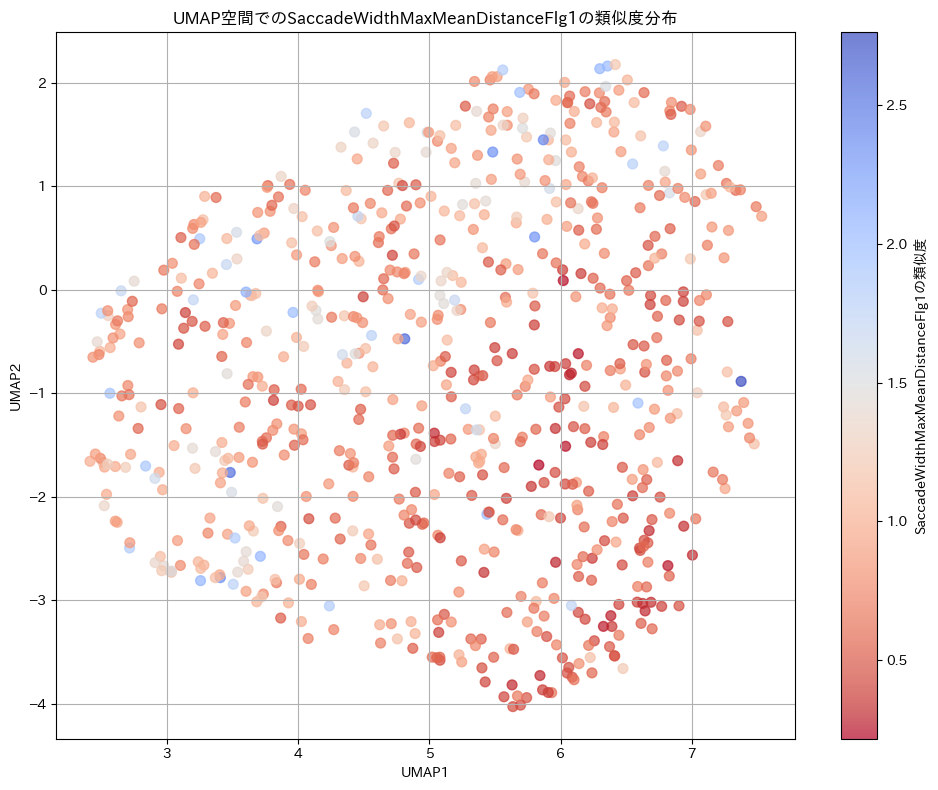

UMAP次元との相関係数をG:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\result\dr\umap_feature_correlations.csvに保存しました
UMAP結果をG:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\result\dr\umap_result.csvに保存しました


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns
import matplotlib as mpl
import japanize_matplotlib

# ファイルパスの設定
path = "G:/共有ドライブ/GAP_長寿研/user/iwamoto/視線の動きの俊敏さ/data"
file_path = f"{path}/features_0428_傾斜.csv"

# 結果を保存するディレクトリ
import os
result_path = r"G:\共有ドライブ\GAP_長寿研\user\iwamoto\視線の動きの俊敏さ\result\dr"
os.makedirs(result_path, exist_ok=True)

# データの読み込み
# データはCSVなのでsep=','を指定 (必要に応じてsep='\t'に変更)
data = pd.read_csv(file_path, sep=',')

# データの基本情報を確認
print("データのサイズ:", data.shape)
print("カラム名:", data.columns[:10], "...")  # 最初の10カラムのみ表示

# EyeSideとMoCAを除いた数値データのみを特徴量として使用
# 特徴量行列の作成
X = data.drop(['MoCA','InspectionDateAndId','target',"EyeSide","MoCALabel"], axis=1, errors='ignore')

# NaN値の確認と処理（必要に応じて）
print("NaN値の合計:", X.isna().sum().sum())
if X.isna().sum().sum() > 0:
    X = X.fillna(X.mean())  # NaN値を平均値で置換

# 特徴量のスケーリング（標準化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAPによる次元削減
# n_neighbors: 近傍点の数（小さいと局所構造を保持、大きいとグローバル構造を保持）
# min_dist: 埋め込み後の点の最小距離（小さいとクラスターが密になる）
# n_components: 次元削減後の次元数
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# 結果をデータフレームに格納
result_df = pd.DataFrame({
    'UMAP1': embedding[:, 0],
    'UMAP2': embedding[:, 1],
    'EyeSide': data['EyeSide'] if 'EyeSide' in data.columns else None,
    'MoCA': data['MoCA'] if 'MoCA' in data.columns else None
})

print("UMAP結果:")
print(result_df)

# 可視化
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='UMAP1', 
    y='UMAP2', 
    hue='MoCA' if 'MoCA' in data.columns else None,
    palette='viridis',
    data=result_df
)
plt.title('UMAP次元削減結果')
plt.tight_layout()
plt.savefig(os.path.join(result_path, 'umap_result.png'))
plt.show()

# 3次元に削減した場合の可視化（オプション）
if True:  # 3次元可視化が必要な場合はFalseをTrueに変更
    reducer_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
    embedding_3d = reducer_3d.fit_transform(X_scaled)
    
    result_df_3d = pd.DataFrame({
        'UMAP1': embedding_3d[:, 0],
        'UMAP2': embedding_3d[:, 1],
        'UMAP3': embedding_3d[:, 2],
        'EyeSide': data['EyeSide'] if 'EyeSide' in data.columns else None,
        'MoCA': data['MoCA'] if 'MoCA' in data.columns else None
    })
    
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(
        embedding_3d[:, 0],
        embedding_3d[:, 1],
        embedding_3d[:, 2],
        c=data['MoCA'] if 'MoCA' in data.columns else None,
        cmap='viridis',
        s=50
    )
    
    if 'MoCA' in data.columns:
        plt.colorbar(scatter, ax=ax, label='MoCA')
        
    ax.set_title('UMAP 3D Visualization')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')
    
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, 'umap_3d_result.png'))
    plt.show()
# UMAPと元の特徴量の関係性を可視化するヒートマップ
# 特徴量とUMAP次元の相関を計算
correlations = pd.DataFrame(index=['UMAP1', 'UMAP2'])

for feature in X.columns:
    # UMAPの各次元と特徴量の相関を計算
    corr_umap1 = np.corrcoef(embedding[:, 0], X[feature])[0, 1]
    corr_umap2 = np.corrcoef(embedding[:, 1], X[feature])[0, 1]
    correlations[feature] = [corr_umap1, corr_umap2]

# 相関値の絶対値でソートし、影響が大きい特徴量を特定
abs_corrs = correlations.abs().mean().sort_values(ascending=False)
top_features = abs_corrs.index[:60]  # 上位ｎ位の特徴量を選択

# 相関係数の表を作成
correlation_table = correlations[top_features].T
correlation_table.columns = ['UMAP1相関', 'UMAP2相関']
correlation_table['平均絶対相関'] = abs_corrs[top_features]

# 上位の特徴量のみを使ったヒートマップ
plt.figure(figsize=(18, 8))
sns.heatmap(
    correlations[top_features], 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt='.2f'
)
plt.title('UMAP次元と元の特徴量との相関')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(result_path, 'umap_feature_correlation.png'))
plt.show()

# 特徴量の分布を色で表した散布図
# 上位の特徴量から数個を選択して可視化
for feature in top_features[:5]:  # 上位5つの特徴量について可視化
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=X[feature],
        cmap='viridis',
        alpha=0.7,
        s=50
    )
    plt.colorbar(scatter, label=feature)
    plt.title(f'UMAP次元削減結果 ({feature}による色分け)')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'umap_colored_by_{feature}.png'))
    plt.show()

# UMAP空間での近接点の特徴分析
from sklearn.neighbors import NearestNeighbors

# UMAP空間での近接点を見つける
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embedding)
distances, indices = nn.kneighbors(embedding)

# 各点の近接点との特徴量平均差を計算
feature_similarity = pd.DataFrame(index=range(len(embedding)), columns=top_features[:10])

for i in range(len(embedding)):
    neighbors = indices[i, 1:]  # 自分自身を除く
    for feature in top_features[:10]:
        # 自分と近接点の特徴量差の平均
        feature_similarity.loc[i, feature] = np.mean(np.abs(X.iloc[i][feature] - X.iloc[neighbors][feature]))

# 近接点との特徴差が小さい＝クラスタ内で均一な特徴
# 近接点との特徴差が大きい＝クラスタの境界に位置する可能性
for feature in top_features[:5]:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=feature_similarity[feature],
        cmap='coolwarm_r',  # 逆にして、差が小さい（類似度が高い）ほど暖色に
        alpha=0.7,
        s=50
    )
    plt.colorbar(scatter, label=f'{feature}の類似度')
    plt.title(f'UMAP空間での{feature}の類似度分布')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(result_path, f'umap_similarity_{feature}.png'))
    plt.show()



# 結果をCSVファイルとして保存
result_csv_path = os.path.join(result_path, 'umap_result.csv')
result_df.to_csv(result_csv_path, index=False)

# CSVファイルとして保存
correlation_csv_path = os.path.join(result_path, 'umap_feature_correlations.csv')
correlation_table.to_csv(correlation_csv_path)

print(f"UMAP次元との相関係数を{correlation_csv_path}に保存しました")

print(f"UMAP結果を{result_csv_path}に保存しました")